# Initial Data Exploration, Analysis & Preparation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
input_df = pd.read_csv('./Data/train.csv')

#### Size of Data Set

In [3]:
input_df.shape

(891, 12)

#### What are attributes?

In [4]:
input_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

#### A glance at data

In [5]:
input_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##### Descriptive statistics

In [6]:
input_df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [7]:
input_df.describe(include=np.object).T

,count,unique,top,freq
Name,891,891,"Sutton, Mr. Frederick",1
Sex,891,2,male,577
Ticket,891,681,CA. 2343,7
Cabin,204,147,C23 C25 C27,4
Embarked,889,3,S,644


#### Missing Data

In [8]:
for _ in input_df.columns:
    print('Nmber of nulls in '  + _ + ' - ' + str(input_df[_].isnull().sum() ))

Nmber of nulls in PassengerId - 0
Nmber of nulls in Survived - 0
Nmber of nulls in Pclass - 0
Nmber of nulls in Name - 0
Nmber of nulls in Sex - 0
Nmber of nulls in Age - 177
Nmber of nulls in SibSp - 0
Nmber of nulls in Parch - 0
Nmber of nulls in Ticket - 0
Nmber of nulls in Fare - 0
Nmber of nulls in Cabin - 687
Nmber of nulls in Embarked - 2


### Handling Missing Data

#### Missing Age

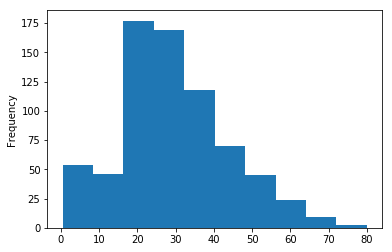

In [9]:
input_df.Age.plot(kind='hist')

In [10]:
print('Mode', input_df.Age.mode()[0])
print('Median', input_df.Age.median())
print('Mean', input_df.Age.mean())
print('Min', input_df.Age.min())

Mode 24.0
Median 28.0
Mean 29.69911764705882
Min 0.42


In [11]:
passengers_with_missing_age = input_df[input_df.Age.isnull()]

In [12]:
passengers_with_missing_age.groupby('Sex')['PassengerId'].count()

Sex
female     53
male      124
Name: PassengerId, dtype: int64

In [13]:
passengers_with_missing_age.groupby('SibSp')['PassengerId'].count()

SibSp
0    137
1     26
2      3
3      4
8      7
Name: PassengerId, dtype: int64

In [14]:
passengers_with_missing_age.groupby('Parch')['PassengerId'].count()

Parch
0    157
1      8
2     12
Name: PassengerId, dtype: int64

#### Analysis points to be kept in mind for imputation
* Most passengers are from age group of 20-30
* Most are Males belonging to third passenger class, possibly young.
* Most travelling __solo__, possibly __young__ and/or __single__.

Let's choose randomly from Mode, Median and Mean to impute missing ages.

In [15]:
def impute_age(x):
    from random import randint
    from math import isnan
    if isnan(x):
        imputation_tray = [24, 28, 29]
        return imputation_tray[randint(0,2)]
    else:
        return x
input_df['Age'] = input_df['Age'].apply(impute_age)

In [16]:
for _ in input_df.columns:
    print('Nmber of nulls in '  + _ + ' - ' + str(input_df[_].isnull().sum() ))

Nmber of nulls in PassengerId - 0
Nmber of nulls in Survived - 0
Nmber of nulls in Pclass - 0
Nmber of nulls in Name - 0
Nmber of nulls in Sex - 0
Nmber of nulls in Age - 0
Nmber of nulls in SibSp - 0
Nmber of nulls in Parch - 0
Nmber of nulls in Ticket - 0
Nmber of nulls in Fare - 0
Nmber of nulls in Cabin - 687
Nmber of nulls in Embarked - 2


#### Missing Cabin

Missing cabin can be taken as an understanding that person did not had a cabin booked. So these should not be considered missing.

In [17]:
input_df['Cabin_'] = input_df['Cabin'].apply(lambda x: 0 if x is np.nan else 1)
# input_df['Cabin_'] = input_df['Cabin_'].astype(object)
# del input_df['Cabin']

In [18]:
input_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.45,NaN,S,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C,1
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q,0


#### Missing Embarkation Port

In [19]:
input_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [20]:
input_df['Embarked'] = input_df['Embarked'].fillna('S') # fill in missing values with most common

In [21]:
for _ in input_df.columns:
    print('Nmber of nulls in '  + _ + ' - ' + str(input_df[_].isnull().sum() ))

Nmber of nulls in PassengerId - 0
Nmber of nulls in Survived - 0
Nmber of nulls in Pclass - 0
Nmber of nulls in Name - 0
Nmber of nulls in Sex - 0
Nmber of nulls in Age - 0
Nmber of nulls in SibSp - 0
Nmber of nulls in Parch - 0
Nmber of nulls in Ticket - 0
Nmber of nulls in Fare - 0
Nmber of nulls in Cabin - 687
Nmber of nulls in Embarked - 0
Nmber of nulls in Cabin_ - 0


### Insights into Target Variable

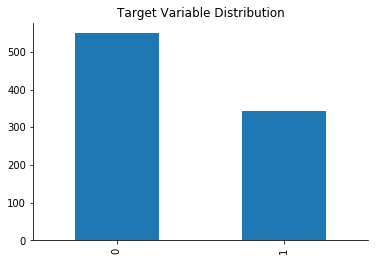

In [33]:
input_df['Survived'].value_counts().plot(kind='bar')
sns.despine()
plt.title("Target Variable Distribution")
plt.savefig(r'.\Media\Target Variable Distribution.png')

### Data Interaction Analysis

##### How Passenger's class is related to its probability of surviving?

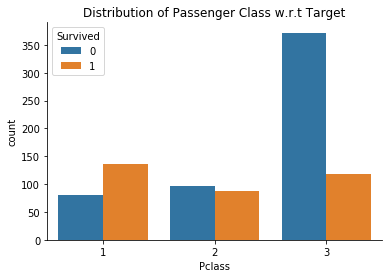

In [34]:
sns.countplot(x = 'Pclass', data=input_df, hue='Survived')
sns.despine()
title = "Distribution of Passenger Class w.r.t Target"

plt.title(title)
plt.savefig(r'.\Media\\' + title + '.png')

##### How Passenger's gender is related to its probability of surviving?

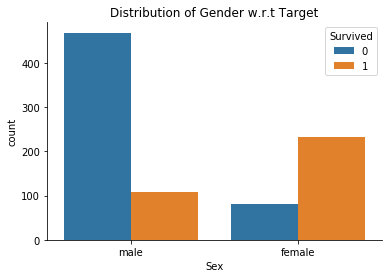

In [35]:
sns.countplot(x = 'Sex', data=input_df, hue='Survived')
sns.despine()
title = "Distribution of Gender w.r.t Target"

plt.title(title)
plt.savefig(r'.\Media\\' + title + '.png')

##### How passenger's siblings & spouse count is related to its probability of surviving?

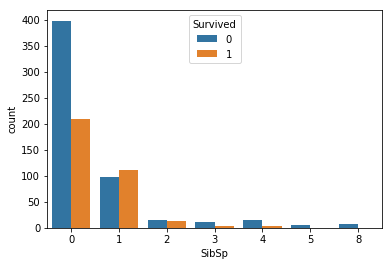

In [25]:
sns.countplot(x = 'SibSp', data=input_df, hue='Survived')

##### How passenger's parents & children count is related to its probability of surviving?

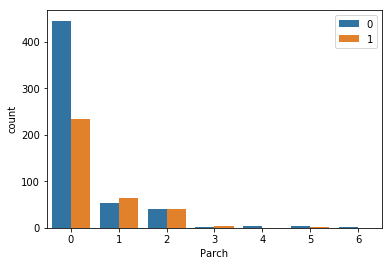

In [26]:
sns.countplot(x = 'Parch', data=input_df, hue='Survived')
plt.legend(loc='upper right')

##### How having a cabin is related to its probability of surviving?

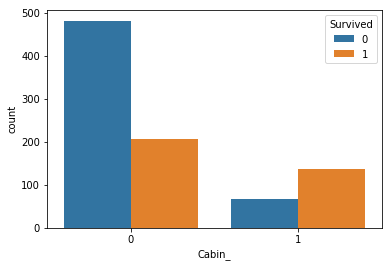

In [27]:
sns.countplot(x = 'Cabin_', data=input_df, hue='Survived')

In [28]:
input_df.to_csv(r'.\Data\train_processed.csv', index=False, encoding='utf-8')